In [1]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [4]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [5]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-01-24 00:00:00+00:00,8445.434570,24397913026,163.051178,10657671162,1.002970,33356108238,17.047409,213341615
2020-01-25 00:00:00+00:00,8367.847656,19647331549,161.283936,8256956802,1.002113,26340299495,16.976107,208315919
2020-01-26 00:00:00+00:00,8596.830078,22177678796,168.077103,9261861590,1.000504,29121614731,17.438633,248646036
2020-01-27 00:00:00+00:00,8909.819336,28647338393,170.930893,11004476145,1.001900,37771545362,17.691341,227584506
2020-01-28 00:00:00+00:00,9358.589844,34398744403,176.370316,11772875064,1.000760,44123906993,18.115135,257579475


In [6]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-01-20 00:00:00+00:00,102016.664062,126279678351,3278.035400,52383187336,0.998951,273447339459,681.803345,2865652878
2025-01-21 00:00:00+00:00,106146.265625,88733878242,3327.406250,32804001146,0.999918,174822279640,691.816589,2008007873
2025-01-22 00:00:00+00:00,103653.070312,53878181052,3240.224609,22171220981,0.999542,112098975855,694.983215,1762077789
2025-01-23 00:00:00+00:00,103960.171875,104104515428,3334.714111,32419520084,1.000158,156427496541,690.203735,2277458782
2025-01-24 00:00:00+00:00,105385.187500,99054927872,3408.960205,35688288256,0.999979,159640518656,688.812988,2116235136


In [7]:
data.shape

(1828, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2020-01-24 00:00:00+00:00 to 2025-01-24 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1828 non-null   float64
 1   Volume (BTC)   1828 non-null   int64  
 2   Close (ETH)    1828 non-null   float64
 3   Volume (ETH)   1828 non-null   int64  
 4   Close (USDT)   1828 non-null   float64
 5   Volume (USDT)  1828 non-null   int64  
 6   Close (BNB)    1828 non-null   float64
 7   Volume (BNB)   1828 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [9]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [10]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03
mean,37495.782263,3.357998e+10,2023.565274,1.691860e+10,1.000373,6.036219e+10,315.578249,1.446762e+09
std,22055.813312,1.993708e+10,1139.039545,1.065738e+10,0.002097,3.917431e+10,198.411153,1.391595e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.365992e+08
25%,20189.397461,2.061794e+10,1285.108429,9.644770e+09,0.999921,3.566244e+10,217.158077,4.758526e+08
50%,33826.669922,3.019101e+10,1889.099792,1.475351e+10,1.000187,5.124244e+10,304.748932,1.133328e+09
75%,52372.040039,4.076479e+10,2949.549316,2.094924e+10,1.000560,7.231949e+10,473.833168,1.910996e+09
max,106146.265625,3.509679e+11,4812.087402,8.448291e+10,1.053585,3.006686e+11,750.272644,1.798295e+10


#Exploratory Data Analysis

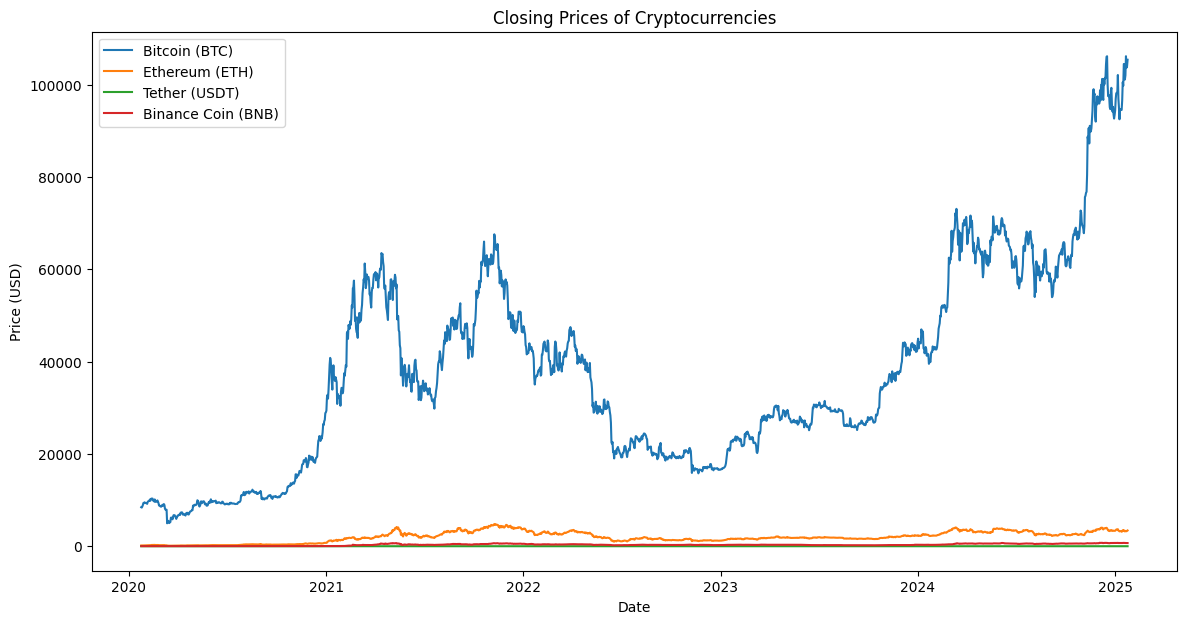

In [11]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

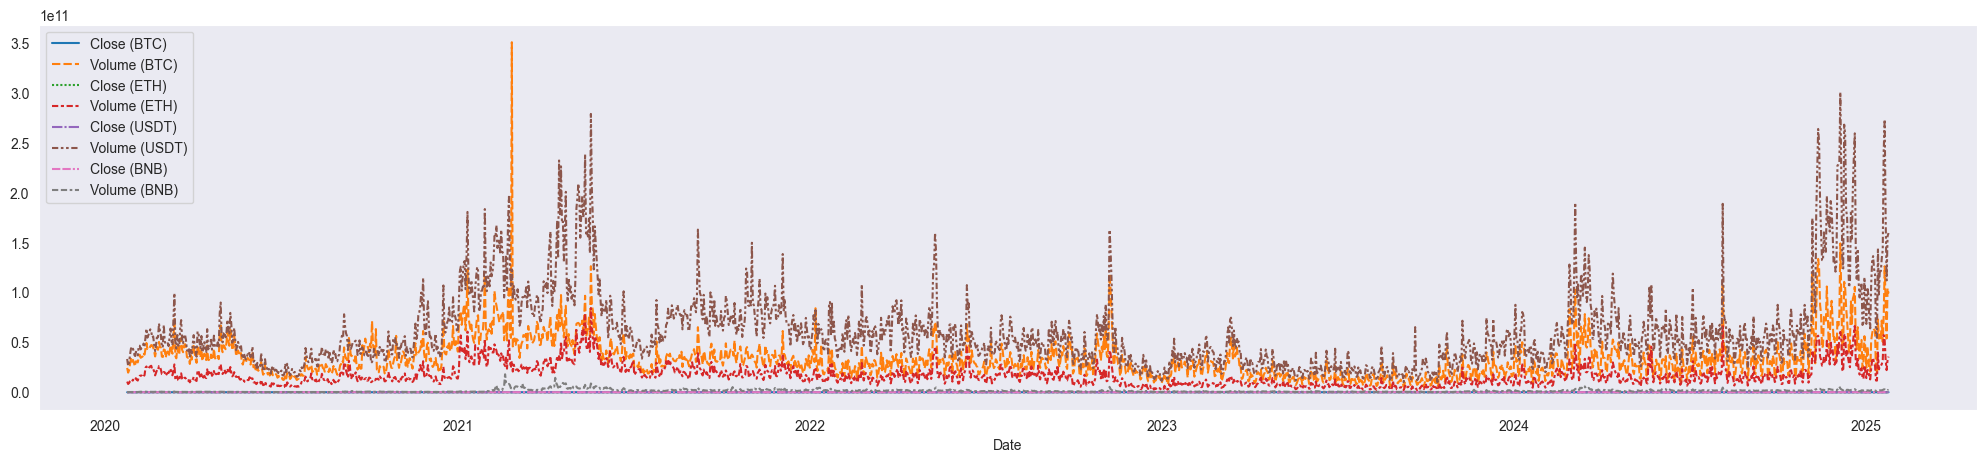

In [12]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

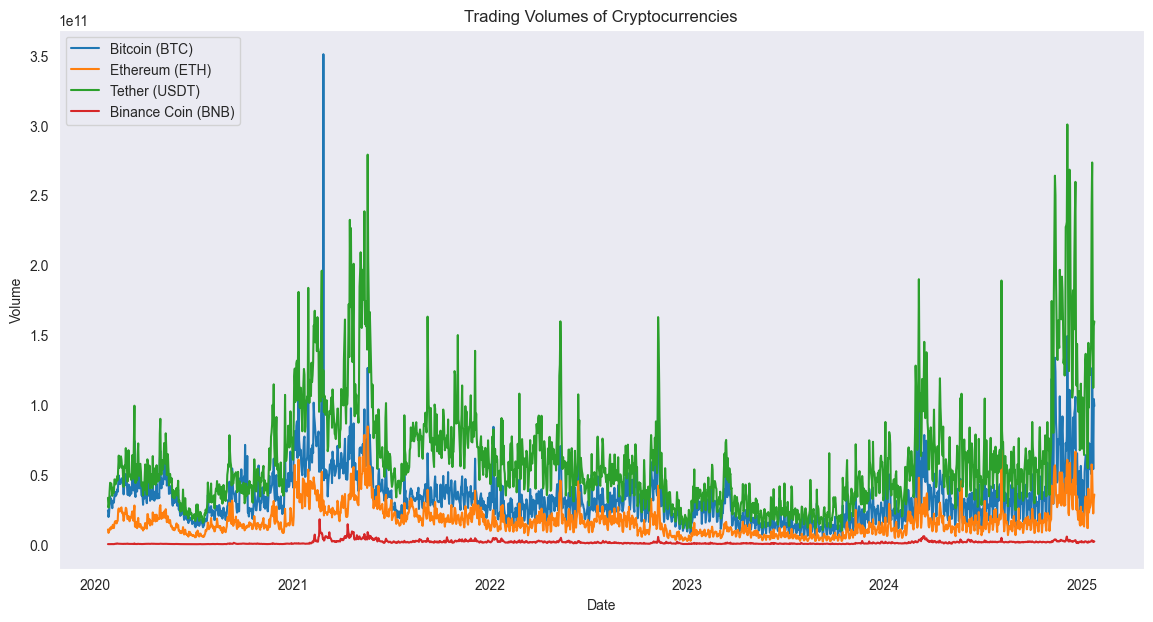

In [13]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


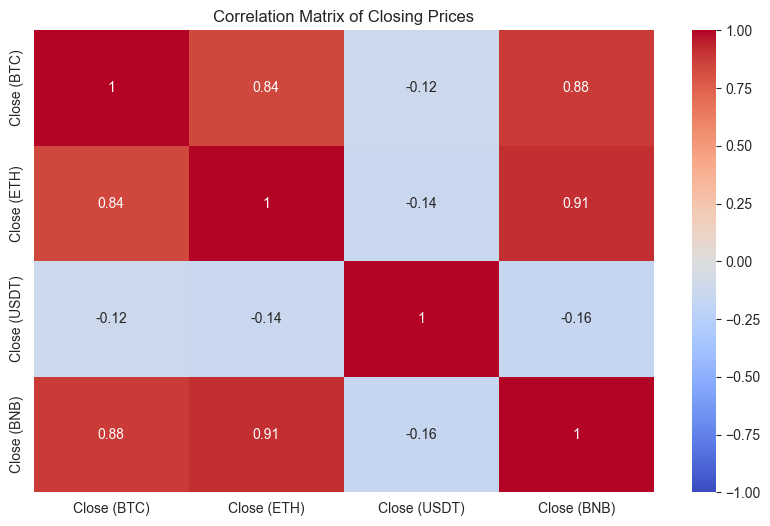

In [14]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


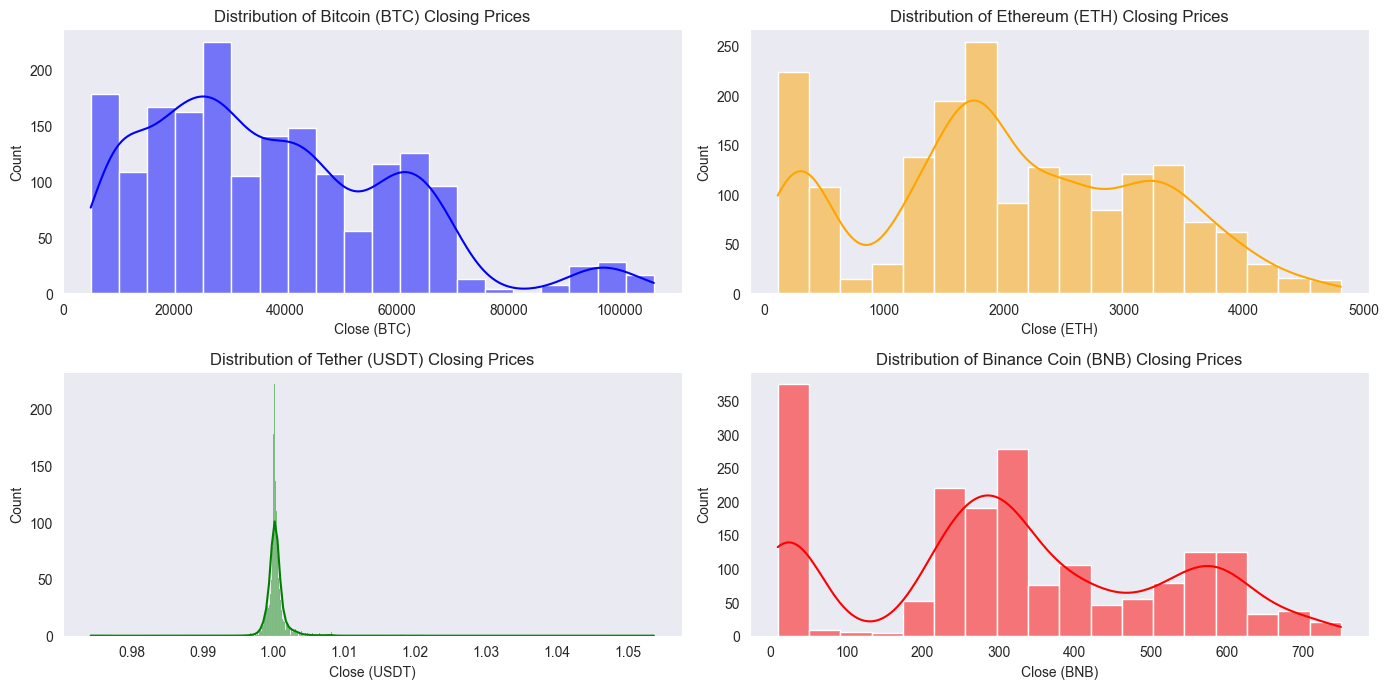

In [15]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

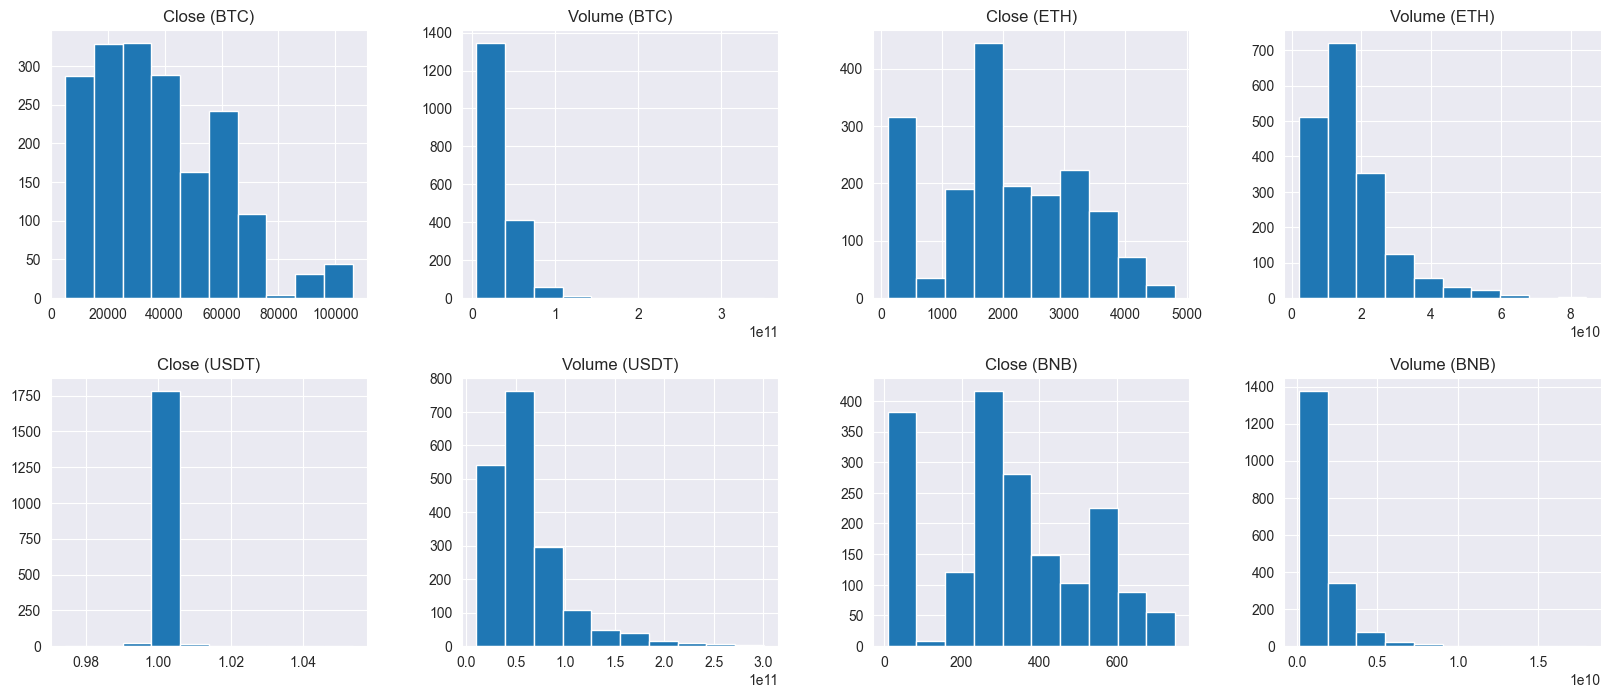

In [16]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

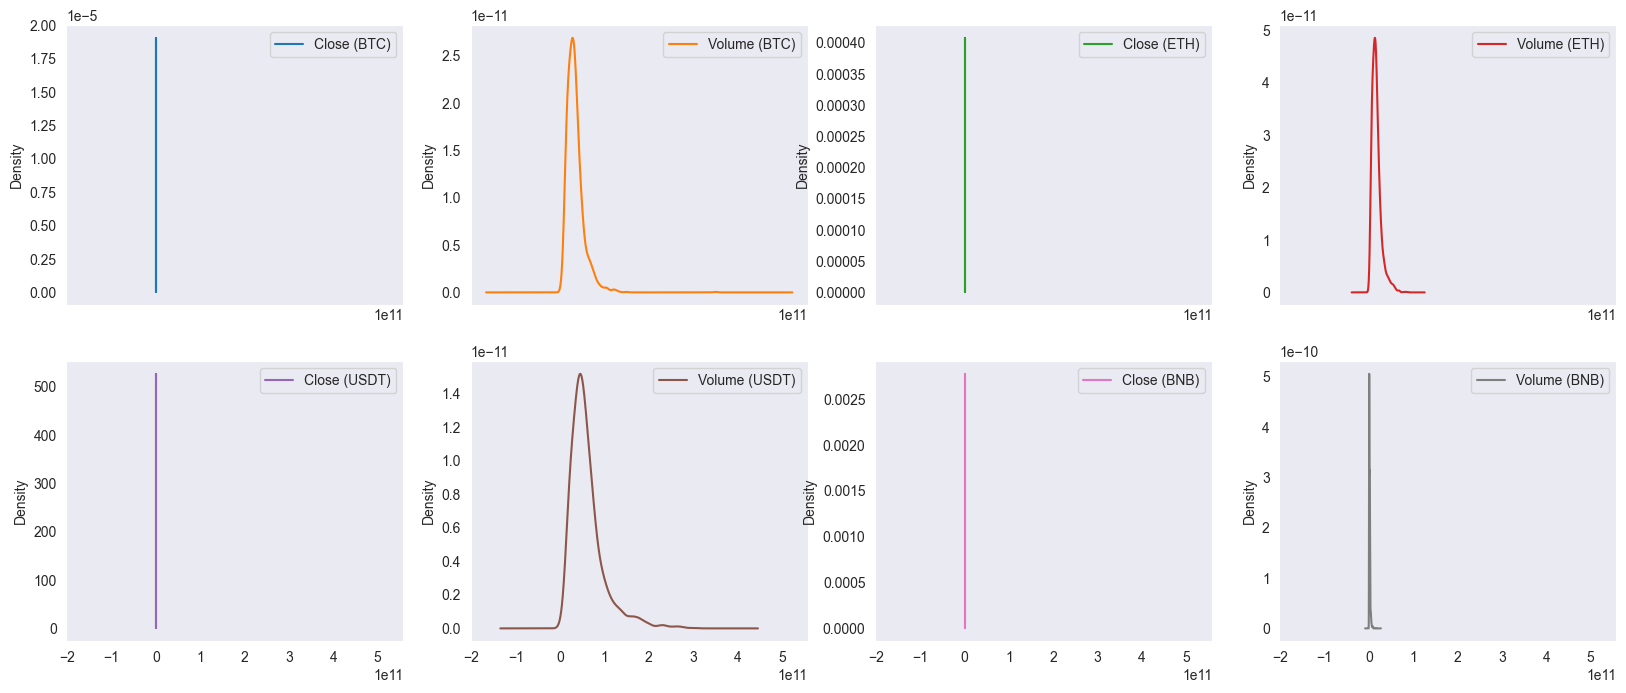

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

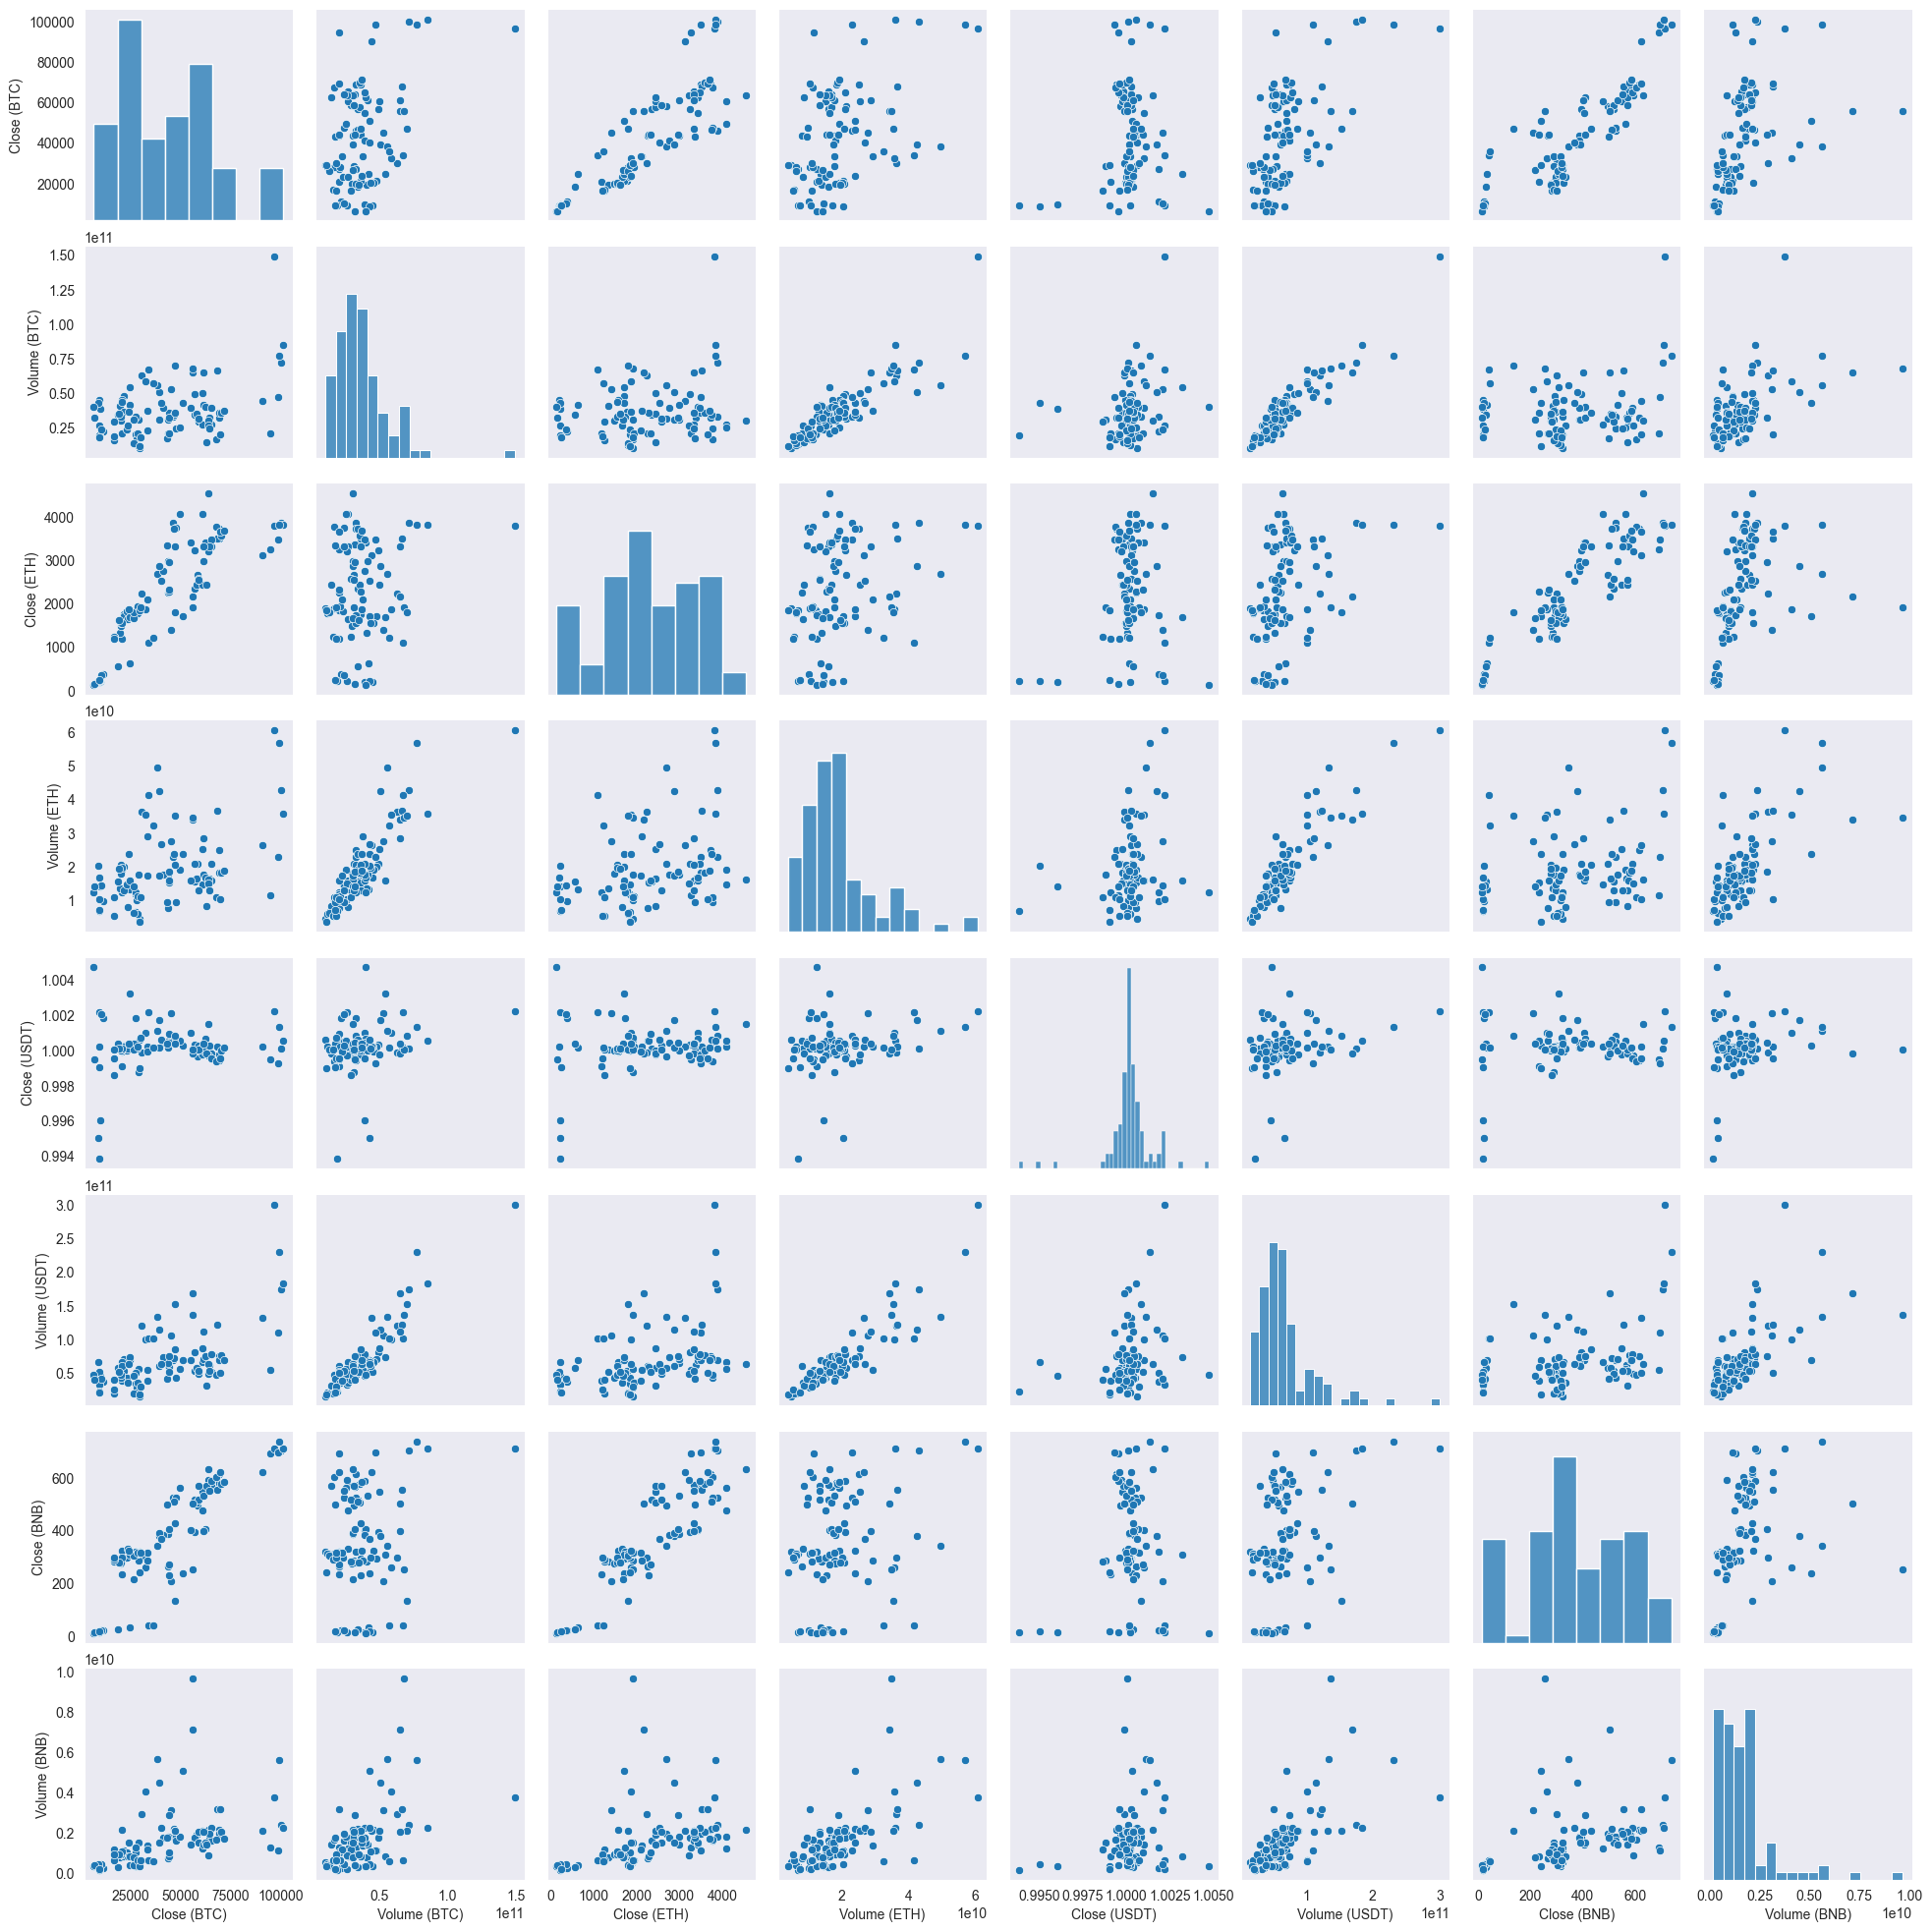

In [18]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [19]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-01-24 00:00:00+00:00,24397913026,163.051178,10657671162,1.002970,33356108238,17.047409,213341615
2020-01-25 00:00:00+00:00,19647331549,161.283936,8256956802,1.002113,26340299495,16.976107,208315919
2020-01-26 00:00:00+00:00,22177678796,168.077103,9261861590,1.000504,29121614731,17.438633,248646036
2020-01-27 00:00:00+00:00,28647338393,170.930893,11004476145,1.001900,37771545362,17.691341,227584506
2020-01-28 00:00:00+00:00,34398744403,176.370316,11772875064,1.000760,44123906993,18.115135,257579475


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-01-20 00:00:00+00:00,126279678351,3278.035400,52383187336,0.998951,273447339459,681.803345,2865652878
2025-01-21 00:00:00+00:00,88733878242,3327.406250,32804001146,0.999918,174822279640,691.816589,2008007873
2025-01-22 00:00:00+00:00,53878181052,3240.224609,22171220981,0.999542,112098975855,694.983215,1762077789
2025-01-23 00:00:00+00:00,104104515428,3334.714111,32419520084,1.000158,156427496541,690.203735,2277458782
2025-01-24 00:00:00+00:00,99054927872,3408.960205,35688288256,0.999979,159640518656,688.812988,2116235136


In [22]:
Y.head()


Date
2020-01-24 00:00:00+00:00    8445.434570
2020-01-25 00:00:00+00:00    8367.847656
2020-01-26 00:00:00+00:00    8596.830078
2020-01-27 00:00:00+00:00    8909.819336
2020-01-28 00:00:00+00:00    9358.589844
Name: Close (BTC), dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1462, 7)
X_test shape: (366, 7)
y_train shape: (1462,)
y_test shape: (366,)


In [25]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

C:\Users\Sriya v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [26]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [27]:
X_train


array([[1.00098503e+00, 4.38728441e+10, 2.88034439e+01, 4.93774162e+08],
       [1.00053704e+00, 5.91390105e+10, 2.23933067e+01, 5.55588378e+08],
       [1.00015497e+00, 6.59355365e+10, 3.87057343e+02, 1.79623565e+09],
       ...,
       [9.99598980e-01, 5.42765276e+10, 5.29481323e+02, 1.82671529e+09],
       [1.00009704e+00, 6.73597871e+10, 3.37873871e+02, 1.55118744e+09],
       [9.99365985e-01, 6.96214573e+10, 6.07592773e+02, 2.24550162e+09]])

In [28]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 80862914.07450162
R-squared: 0.8370733708016116

----- Ridge Regression -----
Mean Squared Error (MSE): 81536014.63060652
R-squared: 0.8357171742562249

----- Lasso Regression -----
Mean Squared Error (MSE): 80847869.64104168
R-squared: 0.8371036830759079

----- ElasticNet Regression -----
Mean Squared Error (MSE): 396308565.86740464
R-squared: 0.20149775087583377

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 493977301.5444589
R-squared: 0.004709914770028467

----- Decision Tree Regression -----
Mean Squared Error (MSE): 54840270.61438051
R-squared: 0.8895050897213969

----- Random Forest Regression -----
Mean Squared Error (MSE): 31813237.720585067
R-squared: 0.9359011031815342

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 31654340.948074486
R-squared: 0.9362212563176405

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 36883288.47606122
R-squared: 0.9256857122460

C:\Users\Sriya v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


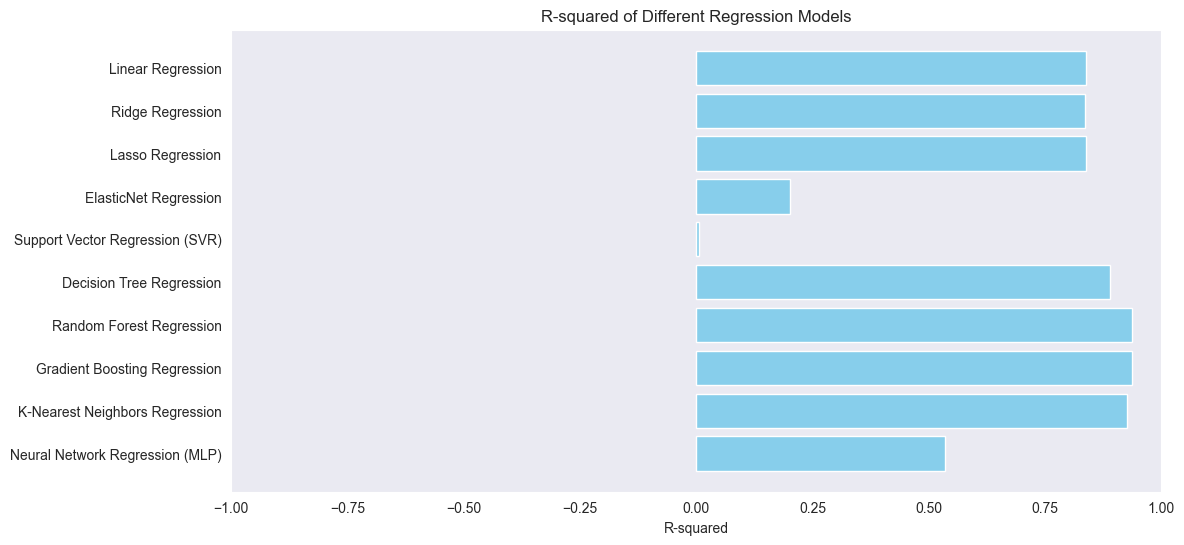

In [30]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [31]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 30006148.122360803
Loaded Random Forest Regression - R-squared: 0.9395421173629782
